<a href="https://colab.research.google.com/github/kumarhimanshu97834-art/Algorithm-Lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Original Array: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

Original Array 2: [4, 2, 2, 5, 6, 2, 1, 7, 3]
Sorted Array 2 in Ascending Order: [1, 2, 2, 2, 3, 4, 5, 6, 7]

Measuring running time for different input sizes...
Size: 100, Time: 0.001114 seconds
Size: 500, Time: 0.001113 seconds
Size: 1000, Time: 0.001225 seconds
Size: 2000, Time: 0.001731 seconds
Size: 5000, Time: 0.002229 seconds
Size: 10000, Time: 0.005984 seconds
Size: 20000, Time: 0.009793 seconds


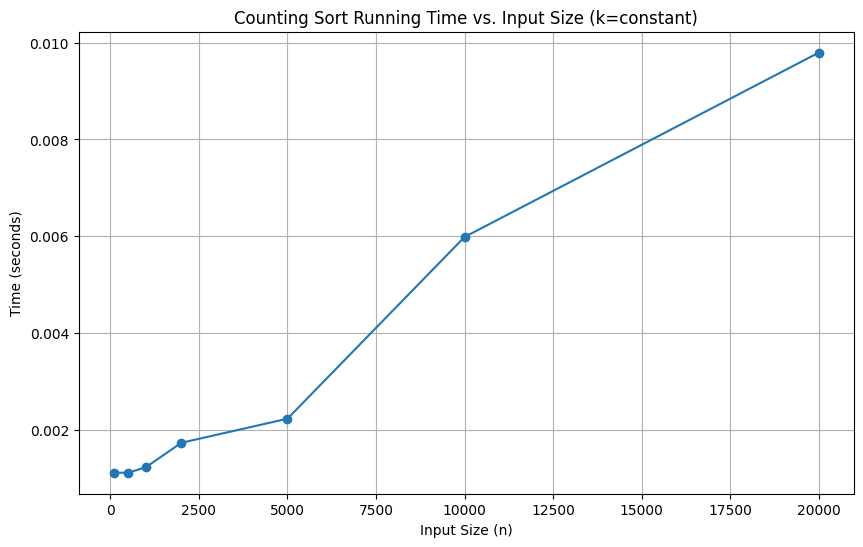

In [38]:
#write code for above cell and compute the running time and also plot graph.
import time
import matplotlib.pyplot as plt
import random

def counting_sort(array):
    if not array:
        return []

    max_element = max(array)
    count = [0] * (max_element + 1)
    output = [0] * len(array)

    for num in array:
        count[num] += 1

    for i in range(1, len(count)):
        count[i] += count[i - 1]

    for i in range(len(array) - 1, -1, -1):
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1

    for i in range(len(array)):
        array[i] = output[i]
    return array


data = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
print("Original Array:", data)
sorted_data = counting_sort(data.copy())
print("Sample Output:", sorted_data)

data2 = [4, 2, 2, 5, 6, 2, 1, 7, 3]
print("\nOriginal Array 2:", data2)
sorted_data2 = counting_sort(data2.copy())
print("Sorted Array 2 in Ascending Order:", sorted_data2)



def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times = []

print("\nMeasuring running time for different input sizes...")
for size in sizes:

    test_array = [random.randint(0, max_val_for_test) for _ in range(size)]

    time_taken = measure_time(counting_sort, test_array.copy())
    times.append(time_taken)
    print(f"Size: {size}, Time: {time_taken:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('Counting Sort Running Time vs. Input Size (k=constant)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Original Array: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sample Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Measuring running time for different input sizes...
Size: 100, Time: 0.000118 seconds
Size: 500, Time: 0.000765 seconds
Size: 1000, Time: 0.000964 seconds
Size: 2000, Time: 0.004247 seconds
Size: 5000, Time: 0.008272 seconds
Size: 10000, Time: 0.011908 seconds
Size: 20000, Time: 0.027172 seconds


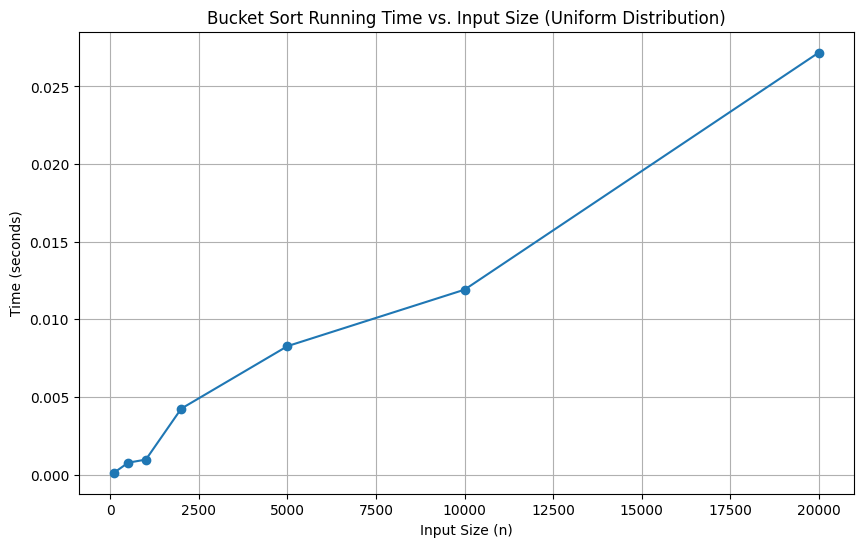

In [39]:
#write code for above cell and compute the running time and also plot graph.
import time
import matplotlib.pyplot as plt
import random

def bucket_sort(array):
    if not array:
        return []

    min_element = min(array)
    max_element = max(array)

    if min_element == max_element:
        return array

    num_buckets = len(array)
    if num_buckets == 0:
        return []


    bucket_range = (max_element - min_element) / num_buckets
    if bucket_range == 0:
        return array

    buckets = [[] for _ in range(num_buckets)]

    for num in array:

        if num == max_element:
            index = num_buckets - 1
        else:
            index = int((num - min_element) / bucket_range)
        buckets[index].append(num)

    sorted_array = []
    for bucket in buckets:

        sorted_array.extend(sorted(bucket))

    return sorted_array

data = [8,5,3,1,9,6,0,7,4,2,5]
print("Original Array:", data)
sorted_data = bucket_sort(data.copy())
print("Sample Output:", sorted_data)


def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times = []


print("\nMeasuring running time for different input sizes...")
for size in sizes:
    # Generate random data with values up to max_val_for_test
    test_array = [random.randint(0, max_val_for_test) for _ in range(size)]
    time_taken = measure_time(bucket_sort, test_array.copy())
    times.append(time_taken)
    print(f"Size: {size}, Time: {time_taken:.6f} seconds")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('Bucket Sort Running Time vs. Input Size (Uniform Distribution)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Original Array: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Measuring running time for different input sizes...
Size: 100, Time: 0.000078 seconds
Size: 500, Time: 0.000318 seconds
Size: 1000, Time: 0.000829 seconds
Size: 2000, Time: 0.001974 seconds
Size: 5000, Time: 0.004160 seconds
Size: 10000, Time: 0.009115 seconds
Size: 20000, Time: 0.027105 seconds


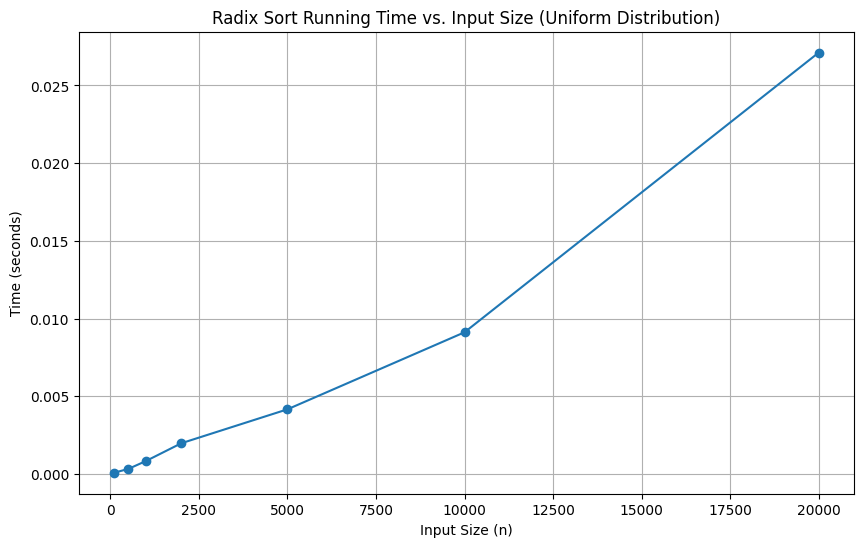

In [36]:
#write code for above cell and compute the running time and also plot graph.
import time
import matplotlib.pyplot as plt
import random

def radix_sort(array):
  if not array:
    return []

  max_element = max(array)
  if max_element == 0:
      return array

  max_digits = len(str(max_element))


  for i in range(max_digits):
      buckets = [[] for _ in range(10)]


      for num in array:
          digit = (num // (10 ** i)) % 10
          buckets[digit].append(num)

      array_index = 0
      for bucket in buckets:
          for num in bucket:
              array[array_index] = num
              array_index += 1
  return array

# Sample Input from problem description
data = [18,5,100,3,1,19,6,0,7,4,2]
print("Original Array:", data)
sorted_data = radix_sort(data.copy())
print("Sample Output:", sorted_data)


def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times = []


if 'max_val_for_test' not in globals():
    max_val_for_test = 10000

print("\nMeasuring running time for different input sizes...")
for size in sizes:

    test_array = [random.randint(0, max_val_for_test) for _ in range(size)]
    time_taken = measure_time(radix_sort, test_array.copy())
    times.append(time_taken)
    print(f"Size: {size}, Time: {time_taken:.6f} seconds")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o')
plt.title('Radix Sort Running Time vs. Input Size (Uniform Distribution)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()